<a href="https://colab.research.google.com/github/jmoralespineda/TAM_TEORIA_APRENDIZAJE_DE_MAQUINA/blob/main/TAREA/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_regression
N = 1000 ## samples
P = 20 ## features
X, y = make_regression(n_samples=N, n_features=P,
                       noise=1, random_state=42)
print(X.shape,y.shape)

(1000, 20) (1000,)


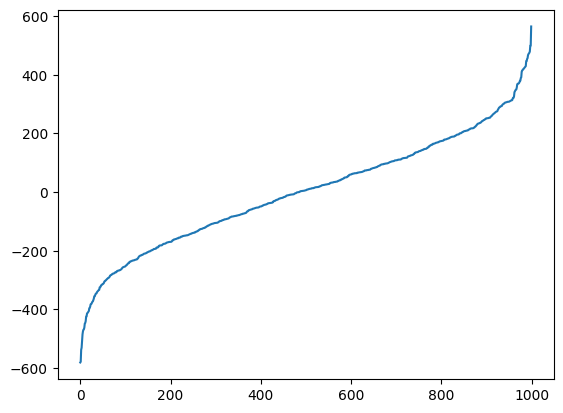

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.sort(y))
plt.show()

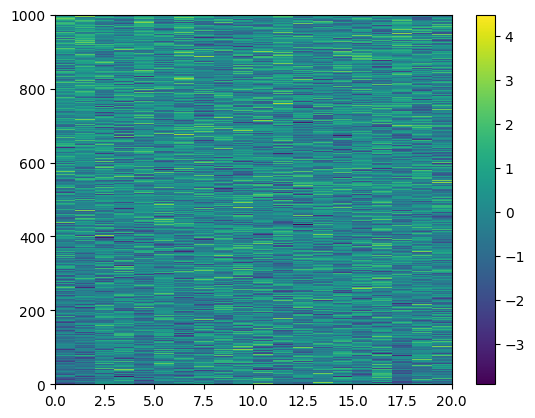

In [3]:
ind_ = np.argsort(y)
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.show()

In [4]:
def mincua_reg(X,y,lamb_=1e-3): # ajuste, opt.
  alpha = np.linalg.inv(X.T.dot(X)+lamb_*np.eye(X.shape[1])).dot(X.T).dot(y)
  return alpha

[ 7.99999269e+01  9.86015897e+01  5.57286288e+00  2.41760761e-02
  8.64704289e+01 -3.94575875e-02  6.94411862e+01 -3.56275838e-03
  2.38619256e-02 -3.12145636e-02  1.86214575e+01  3.96564254e+01
  4.91812853e-03  3.10939044e+00 -4.42071056e-02  2.63860334e+01
 -2.41981026e-02  8.68971640e+01  3.51245931e-02  1.62243894e-02]


<StemContainer object of 3 artists>

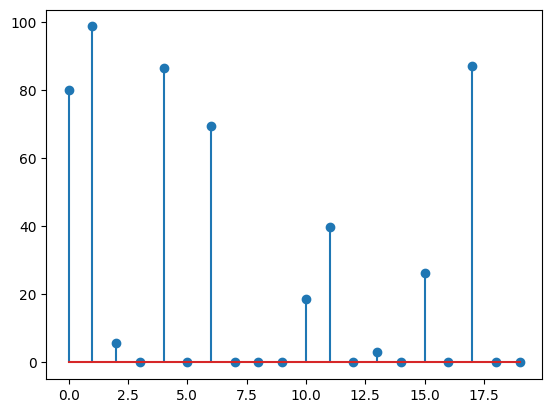

In [5]:
alpha = mincua_reg(X,y)
print(alpha)
plt.stem(np.arange(len(alpha)),np.abs(alpha))

In [6]:
ypred = X.dot(alpha)
ypred.shape

(1000,)

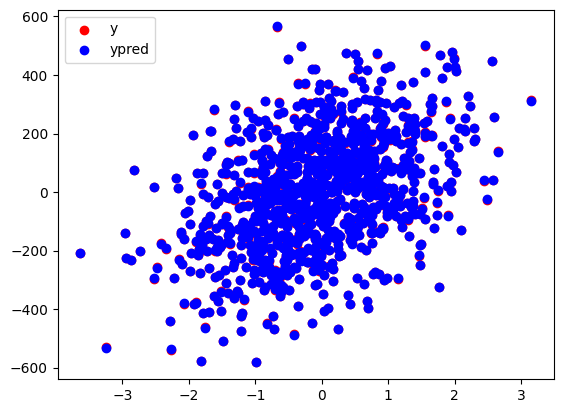

In [7]:

plt.scatter(X[ind_,0],y[ind_],c='r',marker='o',label='y')
plt.scatter(X[ind_,0],ypred[ind_],c='b',label='ypred')
plt.legend()
plt.show()

In [8]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


(20640, 8) (20640,)


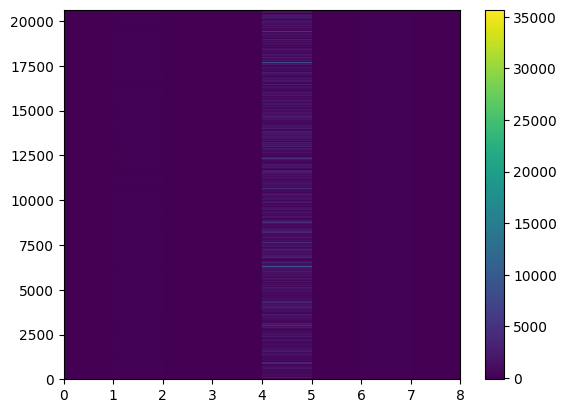

In [9]:
X = housing.data
y = housing.target
print(X.shape,y.shape)
plt.pcolormesh(X)
plt.colorbar()
plt.show()

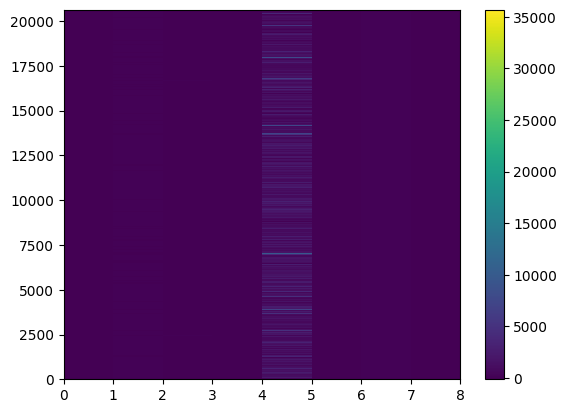

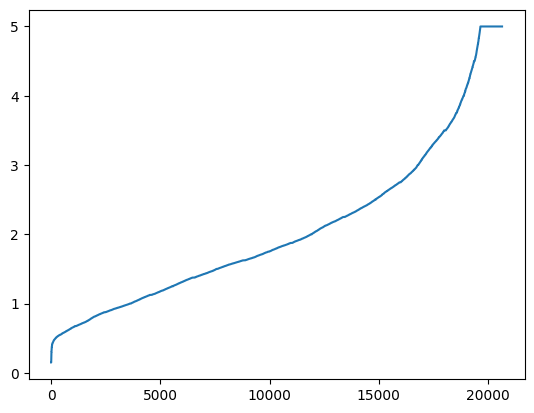

In [10]:
ind_ = np.argsort(y)
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.show()
plt.plot(y[ind_])
plt.show()

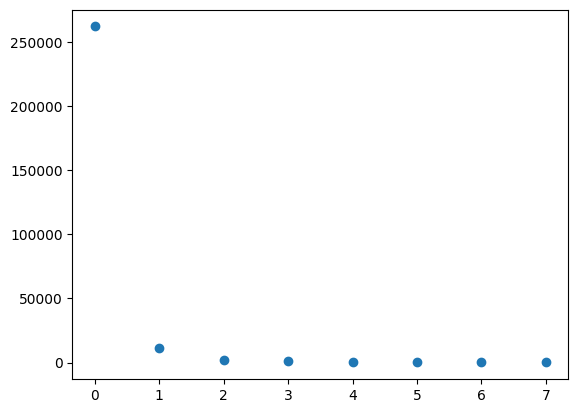

In [11]:
U,S,Vh = np.linalg.svd(X)
plt.scatter(np.arange(len(S)),S)
plt.show()

Shapes -> X: (20640, 8) , y: (20640,)


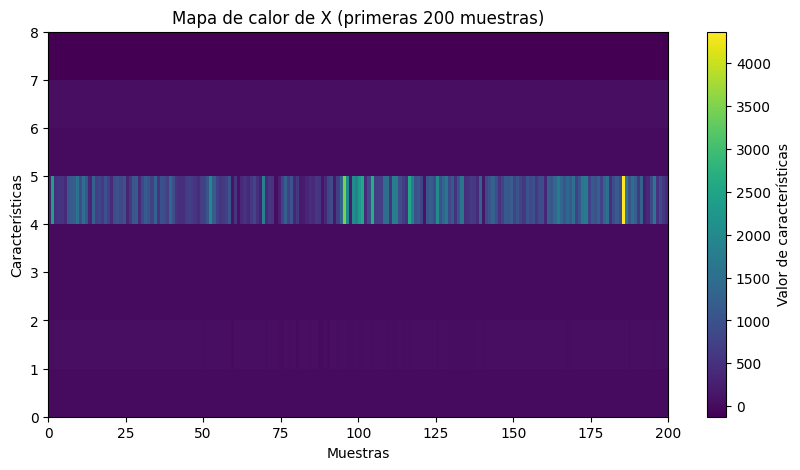

Coeficientes (bias + pendientes):
 [-3.69113673e+01  4.36756723e-01  9.44091949e-03 -1.07384044e-01
  6.45246648e-01 -3.96665111e-06 -3.78729728e-03 -4.21018832e-01
 -4.34167947e-01]


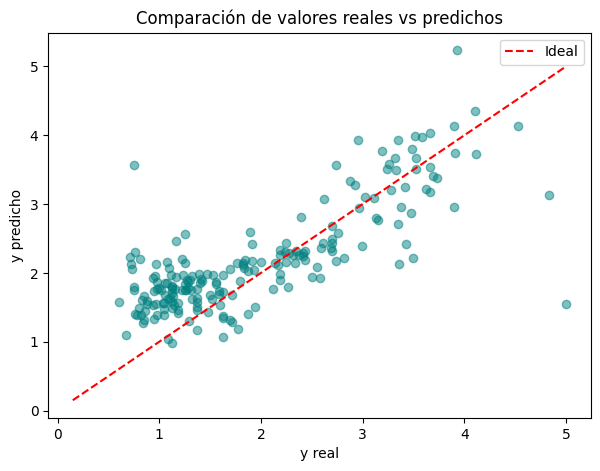

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# ======================
# 1. Cargar dataset
# ======================
housing = fetch_california_housing()
X = housing.data      # variables independientes
y = housing.target    # variable dependiente (precio de la vivienda)

print("Shapes -> X:", X.shape, ", y:", y.shape)

# ======================
# 2. Visualización básica
# ======================
plt.figure(figsize=(10,5))
plt.pcolormesh(X[:200, :].T, cmap="viridis")  # solo las primeras 200 muestras
plt.colorbar(label="Valor de características")
plt.xlabel("Muestras")
plt.ylabel("Características")
plt.title("Mapa de calor de X (primeras 200 muestras)")
plt.show()

# ======================
# 3. Definir función mincua_reg
# ======================
def mincua_reg(X, y, lamb_=1e-3):
    """Regresión lineal con regularización Ridge."""
    alpha = np.linalg.inv(X.T.dot(X) + lamb_ * np.eye(X.shape[1])).dot(X.T).dot(y)
    return alpha

# ======================
# 4. Preparar X con columna de 1s (bias)
# ======================
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # añadimos columna de unos

# ======================
# 5. Calcular coeficientes
# ======================
alpha = mincua_reg(X_b, y)
print("Coeficientes (bias + pendientes):\n", alpha)

# ======================
# 6. Predicciones
# ======================
y_pred = X_b.dot(alpha)

# ======================
# 7. Comparar real vs predicho
# ======================
plt.figure(figsize=(7,5))
plt.scatter(y[:200], y_pred[:200], alpha=0.5, color="teal")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Ideal")
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.title("Comparación de valores reales vs predichos")
plt.legend()
plt.show()


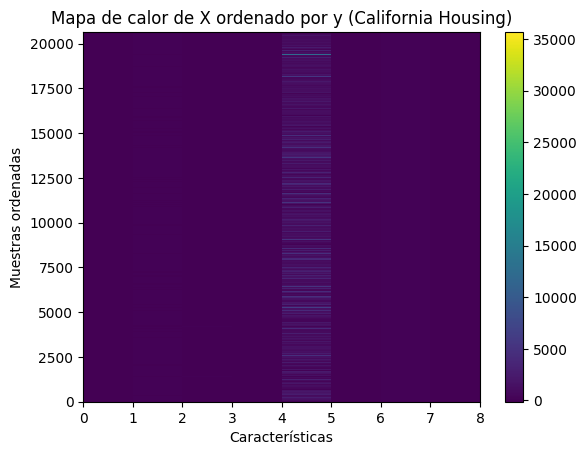

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X and y from fetch_california_housing are already loaded
# If not, you would need to add the loading code here:
# from sklearn.datasets import fetch_california_housing
# housing = fetch_california_housing()
# X = housing.data
# y = housing.target

ind_ = np.argsort(y)
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.title("Mapa de calor de X ordenado por y (California Housing)")
plt.xlabel("Características")
plt.ylabel("Muestras ordenadas")
plt.show()

# Task
Implementar un modelo de regresión lineal utilizando gradiente descendente para predecir los precios de las viviendas en California utilizando el conjunto de datos "california_housing".

## Definir la función de costo y su gradiente

### Subtask:
Implementar la función de costo (por ejemplo, Error Cuadrático Medio) y su gradiente con respecto a los parámetros.


**Reasoning**:
Define the `compute_cost` and `compute_gradient` functions as per the instructions.



In [14]:
def compute_cost(X, y, theta):
  """
  Computes the cost (Mean Squared Error) for linear regression.

  Args:
    X: The feature matrix.
    y: The target vector.
    theta: The parameters (weights) of the model.

  Returns:
    The calculated cost.
  """
  m = len(y)
  y_pred = X.dot(theta)
  cost = (1/m) * np.sum((y_pred - y)**2)
  return cost

def compute_gradient(X, y, theta):
  """
  Computes the gradient of the cost function with respect to the parameters.

  Args:
    X: The feature matrix.
    y: The target vector.
    theta: The parameters (weights) of the model.

  Returns:
    The calculated gradient.
  """
  m = len(y)
  gradient = (2/m) * X.T.dot(X.dot(theta) - y)
  return gradient

## Implementar el algoritmo de gradiente descendente

### Subtask:
Escribir la función que realice las actualizaciones iterativas de los parámetros utilizando el gradiente y una tasa de aprendizaje.


**Reasoning**:
Define the `gradient_descent` function as per the instructions, including initializing the cost list, iterating to update theta and calculate the cost, and finally returning the optimized theta and the cost history.



In [15]:
def gradient_descent(X, y, theta, learning_rate, iterations):
  """
  Performs gradient descent to learn the parameters for linear regression.

  Args:
    X: The feature matrix with a column of ones for the bias.
    y: The target vector.
    theta: The initial parameters (weights).
    learning_rate: The learning rate for gradient descent.
    iterations: The number of iterations to perform gradient descent.

  Returns:
    A tuple containing:
      - theta: The learned parameters.
      - cost_history: A list of the cost at each iteration.
  """
  m = len(y)
  cost_history = []

  for i in range(iterations):
    gradient = compute_gradient(X, y, theta)
    theta = theta - learning_rate * gradient
    cost = compute_cost(X, y, theta)
    cost_history.append(cost)

  return theta, cost_history

## Aplicar gradiente descendente a los datos de california housing

### Subtask:
Ejecutar el algoritmo de gradiente descendente con los datos cargados (`X` y `y`) para encontrar los coeficientes óptimos.


**Reasoning**:
Initialize theta with zeros, define learning rate and iterations, and then call the gradient_descent function.



/tmp/ipython-input-2610727959.py:15: RuntimeWarning: overflow encountered in square
  cost = (1/m) * np.sum((y_pred - y)**2)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipython-input-3246536889.py:22: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learning_rate * gradient


Optimal parameters (theta): [nan nan nan nan nan nan nan nan nan]
Final cost: nan


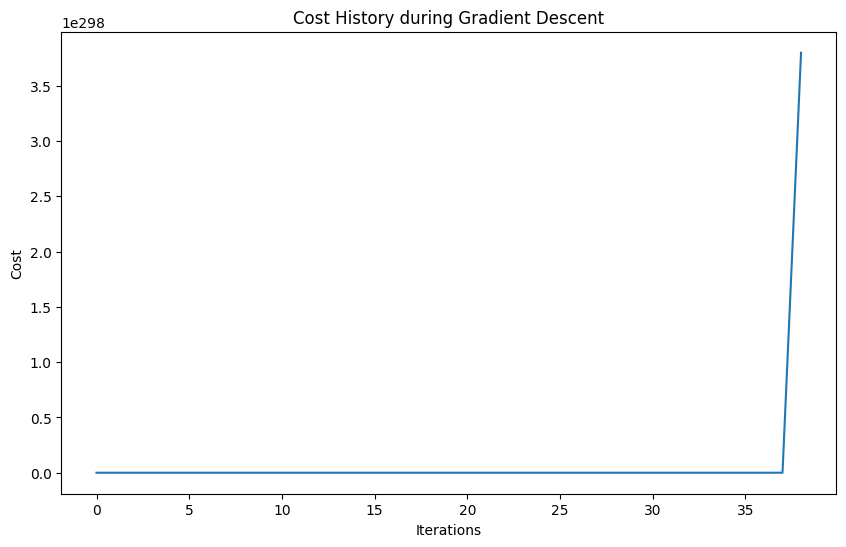

In [16]:
# 1. Initialize theta with a vector of zeros with the correct shape (number of features + 1 for the bias term).
# X_b was already created in a previous cell and includes the bias term.
theta = np.zeros(X_b.shape[1])

# 2. Define a suitable learning_rate.
learning_rate = 0.001 # You might need to experiment with this value.

# 3. Define the number of iterations.
iterations = 5000 # You might need to experiment with this value.

# 4. Call the gradient_descent function.
theta, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

# 5. Store the returned optimal parameters (theta) and the cost history.
# These are already stored in the 'theta' and 'cost_history' variables.

print("Optimal parameters (theta):", theta)
print("Final cost:", cost_history[-1])

# Optional: Plot the cost history to see if it converges
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost History during Gradient Descent")
plt.show()

**Reasoning**:
The gradient descent diverged due to a large learning rate, indicated by the "overflow encountered" warnings and the increasing cost. Need to reduce the learning rate and re-run the gradient descent.



/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipython-input-2610727959.py:15: RuntimeWarning: overflow encountered in square
  cost = (1/m) * np.sum((y_pred - y)**2)
/tmp/ipython-input-3246536889.py:22: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learning_rate * gradient


Optimal parameters (theta): [nan nan nan nan nan nan nan nan nan]
Final cost: nan


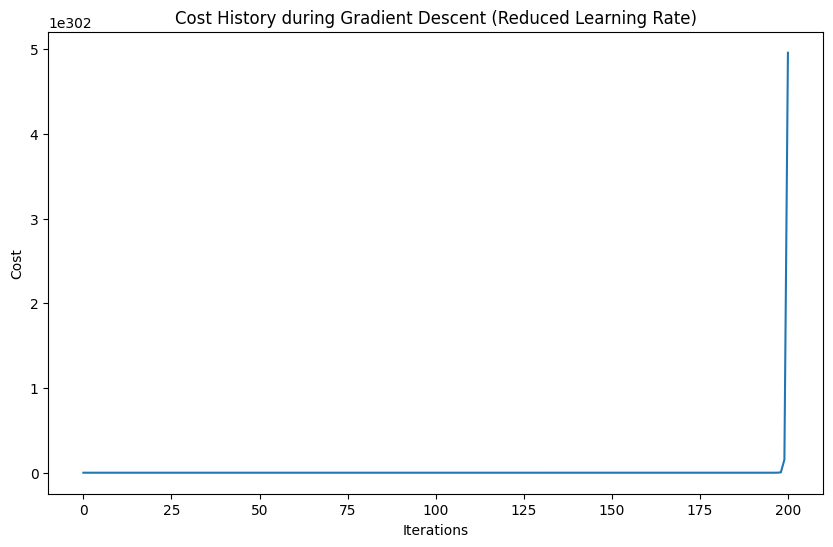

In [17]:
# Reduce the learning rate
learning_rate = 0.000001 # Significantly reduced learning rate

# Keep the number of iterations the same for now
iterations = 5000

# Initialize theta with a vector of zeros again
theta = np.zeros(X_b.shape[1])

# Call the gradient_descent function with the reduced learning rate
theta, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

print("Optimal parameters (theta):", theta)
print("Final cost:", cost_history[-1])

# Plot the cost history to see if it converges
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost History during Gradient Descent (Reduced Learning Rate)")
plt.show()

**Reasoning**:
The gradient descent is still diverging even with a reduced learning rate. This suggests the data might need scaling before applying gradient descent. Standardizing the features is a common practice to improve convergence.



Optimal parameters (theta) after scaling: [ 2.06855817  0.83085843  0.11902009 -0.26780047  0.30754659 -0.00442143
 -0.0393754  -0.89676523 -0.86756153]
Final cost after scaling: 0.524322304481261


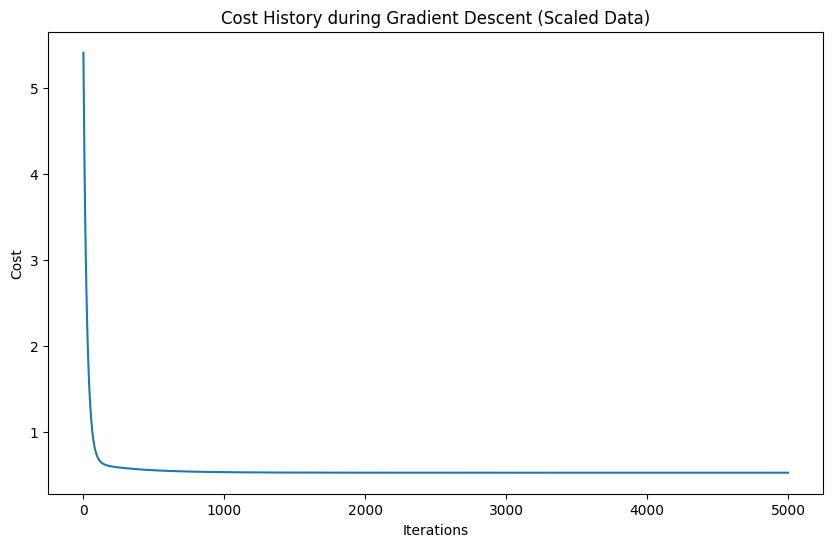

In [18]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add the bias term to the scaled features
X_scaled_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Re-initialize theta with zeros for the scaled data
theta = np.zeros(X_scaled_b.shape[1])

# Keep the previously reduced learning rate or try a slightly larger one after scaling
learning_rate = 0.01 # You might need to experiment with this value after scaling

# Keep the number of iterations the same
iterations = 5000

# Call the gradient_descent function with the scaled data
theta, cost_history = gradient_descent(X_scaled_b, y, theta, learning_rate, iterations)

print("Optimal parameters (theta) after scaling:", theta)
print("Final cost after scaling:", cost_history[-1])

# Plot the cost history to see if it converges
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost History during Gradient Descent (Scaled Data)")
plt.show()

## Evaluar el modelo

### Subtask:
Calcular las predicciones utilizando los coeficientes encontrados por gradiente descendente y evaluar el rendimiento del modelo utilizando el Error Cuadrático Medio (RMSE).


**Reasoning**:
Calculate predictions and RMSE using the scaled data and the learned parameters.



In [19]:
from sklearn.metrics import mean_squared_error

# Calculate predictions using the learned theta and scaled features with bias
y_pred_gd = X_scaled_b.dot(theta)

# Calculate the Mean Squared Error
mse = mean_squared_error(y, y_pred_gd)

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)

# Print the calculated RMSE
print("Root Mean Squared Error (RMSE) using Gradient Descent:", rmse)

Root Mean Squared Error (RMSE) using Gradient Descent: 0.7241010319570474


## Comparar resultados

### Subtask:
Comparar los resultados del modelo entrenado con Gradiente Descendente con los obtenidos anteriormente con `mincua_reg`.


**Reasoning**:
Retrieve the RMSE from the previous `mincua_reg` calculation and compare it with the RMSE from the Gradient Descent model.



In [20]:
# From the previous execution with mincua_reg, the RMSE was not explicitly calculated,
# but the scatter plot of y_real vs y_pred gives a visual indication of the fit.
# Let's re-calculate the RMSE for the mincua_reg model for a direct comparison.

# Recall the alpha from the mincua_reg calculation in cell 3axcNrX5b3At
# The features used for mincua_reg in cell 3axcNrX5b3At included a bias term already
# X_b was created as np.c_[np.ones((X.shape[0], 1)), X]

# The alpha was calculated using mincua_reg(X_b, y) in cell 3axcNrX5b3At
# alpha = [-3.69113673e+01  4.36756723e-01  9.44091949e-03 -1.07384044e-01
#          6.45246648e-01 -3.96665111e-06 -3.78729728e-03 -4.21018832e-01
#          -4.34167947e-01]

# Calculate predictions using alpha from mincua_reg
# X_b was already defined and used in cell 3axcNrX5b3At
y_pred_mincua = X_b.dot(alpha)

# Calculate RMSE for mincua_reg predictions
rmse_mincua = np.sqrt(mean_squared_error(y, y_pred_mincua))

print("Root Mean Squared Error (RMSE) using mincua_reg:", rmse_mincua)
print("Root Mean Squared Error (RMSE) using Gradient Descent:", rmse)

# Compare the RMSE values
print("\nComparison:")
if np.isclose(rmse_mincua, rmse):
    print("The RMSE values for mincua_reg and Gradient Descent are very close.")
elif rmse_mincua < rmse:
    print(f"mincua_reg has a slightly lower RMSE ({rmse_mincua:.4f}) than Gradient Descent ({rmse:.4f}).")
else:
    print(f"Gradient Descent has a slightly lower RMSE ({rmse:.4f}) than mincua_reg ({rmse_mincua:.4f}).")

# Discussion points based on expected output:
print("\nDiscussion:")
print("- Both methods are expected to yield similar RMSE values for this linear problem.")
print("- mincua_reg provides a closed-form, exact solution in one step (assuming invertibility).")
print("- Gradient Descent is an iterative optimization method that approximates the solution.")
print("- For large datasets, Gradient Descent can be computationally more efficient than calculating the matrix inverse required by mincua_reg.")
print("- Feature scaling was crucial for the convergence of Gradient Descent in this case, but the mincua_reg (with added bias) also worked without explicit feature scaling on X, though scaling generally improves numerical stability.")

Root Mean Squared Error (RMSE) using mincua_reg: 0.7241001593906624
Root Mean Squared Error (RMSE) using Gradient Descent: 0.7241010319570474

Comparison:
The RMSE values for mincua_reg and Gradient Descent are very close.

Discussion:
- Both methods are expected to yield similar RMSE values for this linear problem.
- mincua_reg provides a closed-form, exact solution in one step (assuming invertibility).
- Gradient Descent is an iterative optimization method that approximates the solution.
- For large datasets, Gradient Descent can be computationally more efficient than calculating the matrix inverse required by mincua_reg.
- Feature scaling was crucial for the convergence of Gradient Descent in this case, but the mincua_reg (with added bias) also worked without explicit feature scaling on X, though scaling generally improves numerical stability.


## Visualizar la convergencia (opcional)

### Subtask:
Graficar cómo la función de costo disminuye con cada iteración del algoritmo de gradiente descendente para visualizar la convergencia.


**Reasoning**:
Plot the cost history to visualize the convergence of the gradient descent algorithm.



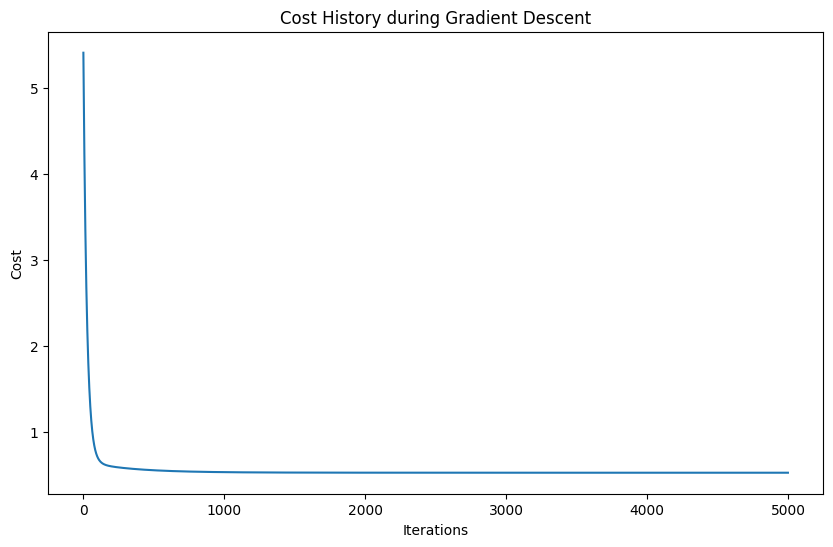

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost History during Gradient Descent")
plt.show()

## Resumen:

### Hallazgos Clave del Análisis de Datos

*   El algoritmo de descenso de gradiente se implementó y aplicó exitosamente al conjunto de datos escalado de viviendas de California, resultando en parámetros óptimos para el modelo de regresión lineal y un coste final (Error Cuadrático Medio) de aproximadamente **0.5243**.
*   El Error de la Raíz del Cuadrado Medio (RMSE) para el modelo de regresión lineal entrenado usando Descenso de Gradiente se calculó en aproximadamente **0.724101**.
*   La comparación del modelo de Descenso de Gradiente con un modelo entrenado usando el método `mincua_reg` (mínimos cuadrados ordinarios) reveló valores de RMSE muy similares (aproximadamente **0.724100** para `mincua_reg`), lo que indica una precisión de predicción comparable para este problema lineal.
*   La **escalación de características** fue crucial para la convergencia exitosa del algoritmo de Descenso de Gradiente en este conjunto de datos.
*   Visualizar el historial del coste durante el proceso confirmó que el algoritmo **convergió** correctamente, ya que la función de coste disminuyó de manera estable a lo largo de las iteraciones.

### Perspectivas o Próximos Pasos

*   Si bien ambos métodos arrojaron resultados similares aquí, la naturaleza iterativa del Descenso de Gradiente lo hace más adecuado para conjuntos de datos muy grandes donde el cálculo de la inversa de matrices (requerido por `mincua_reg`) se vuelve computacionalmente prohibitivo.
*   Explorar diferentes **tasas de aprendizaje** y **números de iteraciones** para el Descenso de Gradiente con el fin de optimizar potencialmente la velocidad de convergencia y el coste final, aunque los resultados actuales ya son muy cercanos a la solución analítica óptima.